In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from scipy.integrate import quad
from scipy.integrate import dblquad

In [2]:
n = 200
x = np.linspace(-1,1,n+1)
y = np.linspace(-1,1,n+1)

a = 0.
b = x[-1]

R = 1

In [3]:
def f(x,y,R=1):
    
    z = R**2 - x**2 - y**2
    
    if z <= 0.:
        return 0
    return np.sqrt(z)

In [5]:
f = np.vectorize(f)

In [6]:
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

<IPython.core.display.Javascript object>


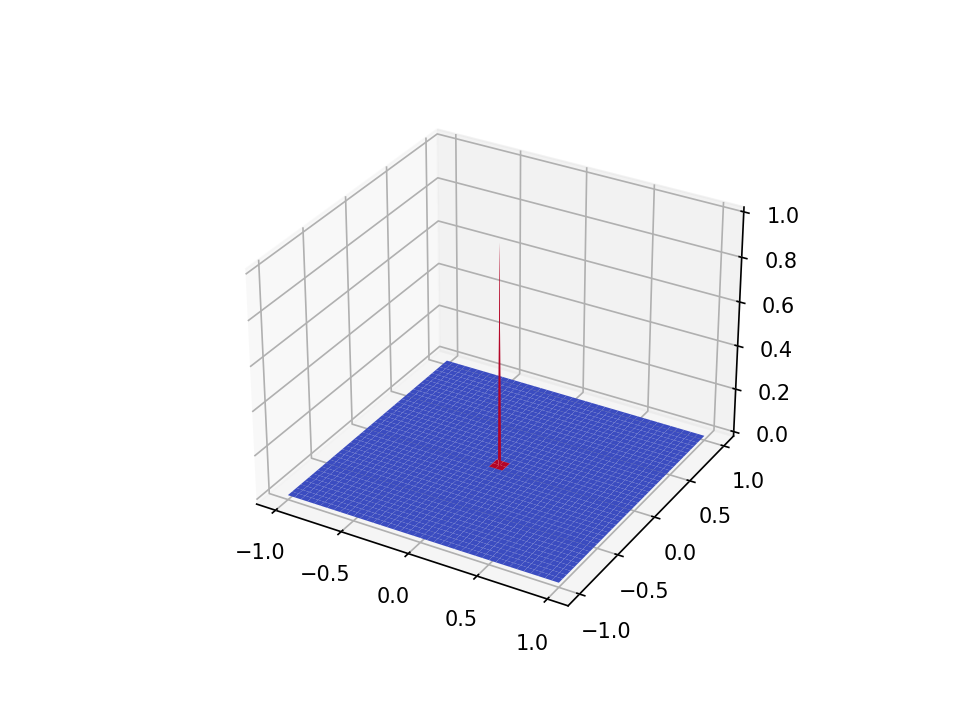

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap='coolwarm')